# Kernels in scikit-learn - Lab

## Introduction

In this lab, we'll explore applying several types of Kernels on some more visual data. At the end of the lab, we'll be looking at a real-life data set again to see how SVMs can be of use there!

## Objectives

You will be able to:
- Create a non-linear SVM in scikit-learn
- Interpret the results of your SVM in scikit-learn
- Apply SVM to a real-world data set


## The data

Let's start this lab where we left things last time: we had a data set which clearly wasn't linearly separable. Next, we'll look at the data with four clusters, as non-linear boundaries might be appropriate here as well. Let's plot the data again.

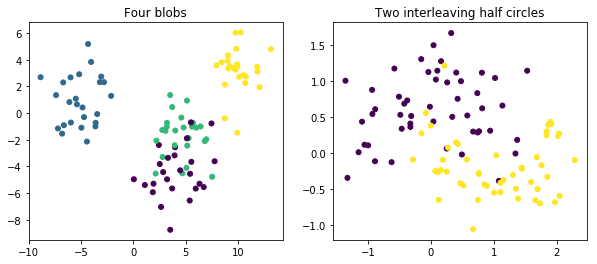

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import svm
from sklearn.model_selection import train_test_split

import numpy as np

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Four blobs")
X_3, y_3 = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6, random_state = 123)
plt.scatter(X_3[:, 0], X_3[:, 1], c = y_3, s=25)

plt.subplot(122)
plt.title("Two interleaving half circles")
X_4, y_4 = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)

plt.show()

## Explore the RBF kernel

In this exercise, we'll explore the RBF kernel looking at the "Two interleaving half circles" data.

Recall how a radial basis function kernel has 2 hyperparameters: `C` and `gamma`. Let's explore RBFs for some values of C and gamma. Using [this resource as a source of inspiration](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html), create 3 x 3 plots for values of gamma = [0.1, 1, 100] and C = [0.1, 1, 100]. Each of the 9 plots should look like this:

![](SVM_rbf.png)

Note that the score represents the percentage of correctly classified instances according to the model. 

In [2]:
# Create a loop that builds a model for each of the 9 combinations
gamma = [0.1, 1, 100]
C = [0.1, 1, 100]
clf_list = []
for g in gamma:
    for c in C:
        clf = svm.SVC(C = c, kernel = 'rbf', gamma = g)
        clf_list.append([g, c, clf])
#print(clf_list)

In [3]:
# Prepare your data for plotting
X_41 = X_4[:,0]
X_42 = X_4[:,1]
X_41_min = min(X_41) - 1
X_41_max = max(X_41) + 1
X_42_min = min(X_42) - 1
X_42_max = max(X_42) + 1
X_41_grid = np.linspace(X_41_min, X_41_max, num = 200)
X_42_grid = np.linspace(X_42_min, X_42_max, num = 200)
XX41, XX42 = np.meshgrid(X_41_grid, X_42_grid)
coords = np.c_[XX41.ravel(), XX42.ravel()]


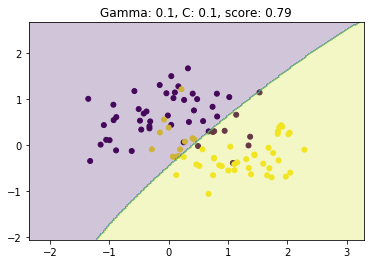

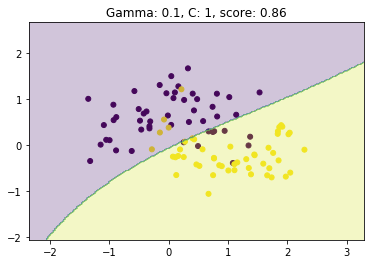

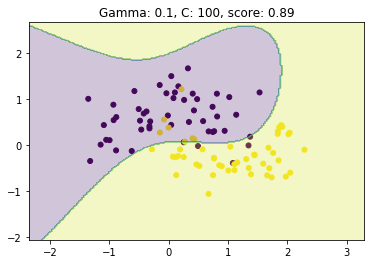

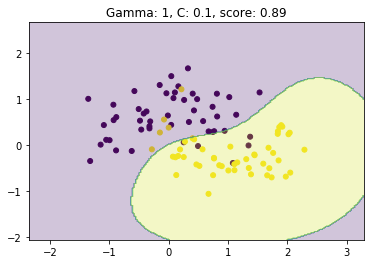

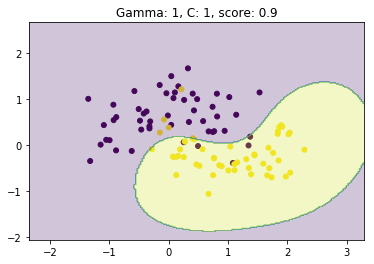

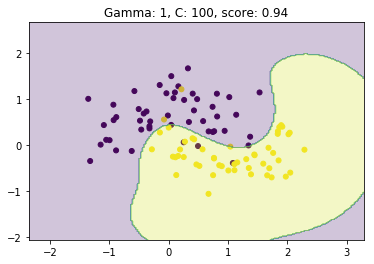

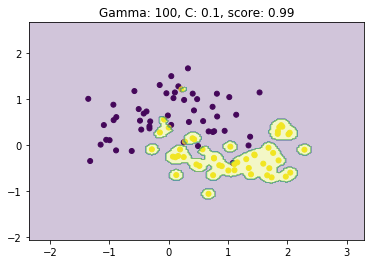

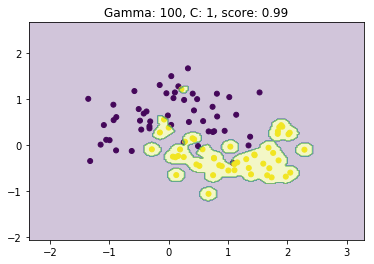

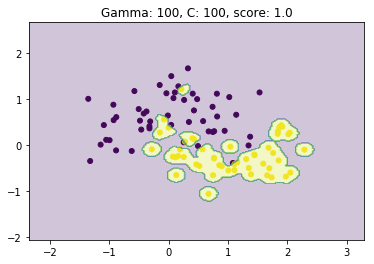

In [4]:
# Plot the prediction results in 9 subplots  
for g, c, clf in clf_list:
    clf.fit(X_4, y_4)
    dec = clf.predict(coords)
    dec = dec.reshape(200,200)
    plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)
    axes = plt.gca()
    axes.set_xlim([X_41_min, X_41_max])
    axes.set_ylim([X_42_min, X_42_max])
    axes.contourf(XX41, XX42, dec,alpha = .25)
    plt.title("Gamma: {}, C: {}, score: {}".format(g, c, round(clf.score(X_4, y_4),2)))
    plt.show()
    

Repeat what you did before but now, use `decision_function` instead of `predict`. What do you see?

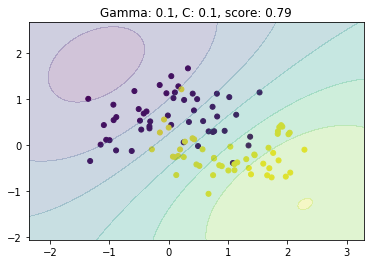

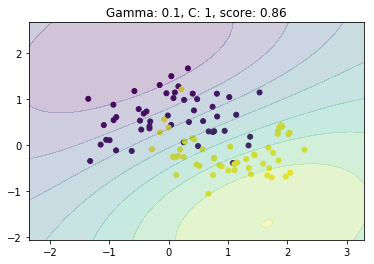

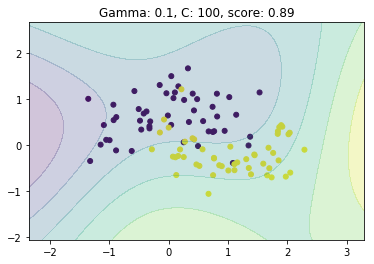

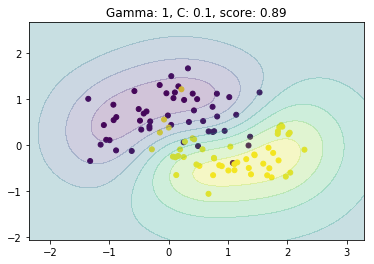

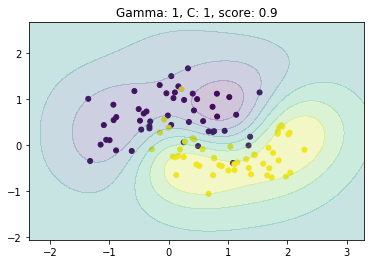

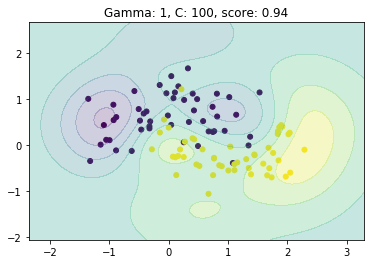

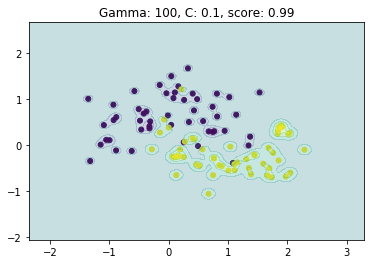

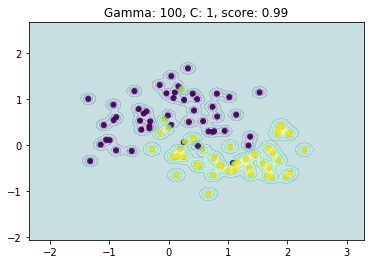

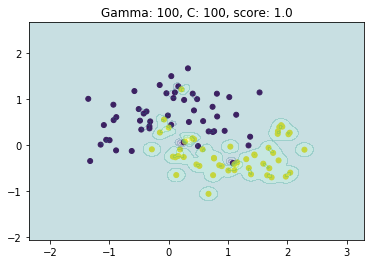

In [5]:
# Plot the decision function results in 9 subplots
for g, c, clf in clf_list:
    clf.fit(X_4, y_4)
    dec = clf.decision_function(coords)
    dec = dec.reshape(200,200)
    plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)
    axes = plt.gca()
    axes.set_xlim([X_41_min, X_41_max])
    axes.set_ylim([X_42_min, X_42_max])
    axes.contourf(XX41, XX42, dec,alpha = .25)
    plt.title("Gamma: {}, C: {}, score: {}".format(g, c, round(clf.score(X_4, y_4),2)))
    plt.show()

## Explore the Polynomial kernel

Recall that the polynomial kernel has 3 hyperparameters:
- $\gamma$, which can be specified using keyword `gamma`
- $r$, which can be specified using keyword `coef0`
- $d$, which can be specified using keyword `degree`

Build 8 different plots using all the possible combinations between there two values for each:
- $r= 0.1$ and $2$
- $\gamma= 0.1$ and $1$
- $d= 3$ and $4$

Note that `decision_function()` cannot be used on a classifier with more than two classes, so simply use `predict()` again.

In [6]:
# Create a loop that builds a model for each of the 8 combinations
R = [0.1, 2]
G = [0.1, 1]
D = [3, 4]
clf_list = []
for r in R:
    for g in G:
        for d in D:
            clf = svm.SVC(C = c, kernel = 'poly', coef0 = r, gamma = g, degree = d)
            clf_list.append([r, g, d, clf])

In [7]:
# Prepare your data for plotting


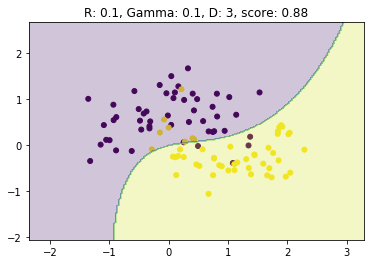

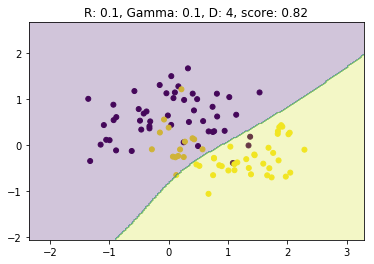

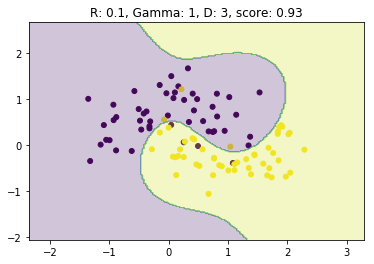

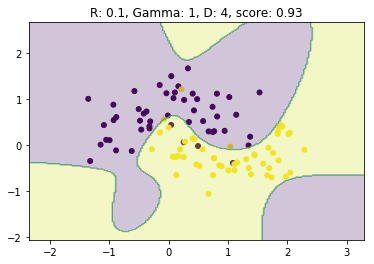

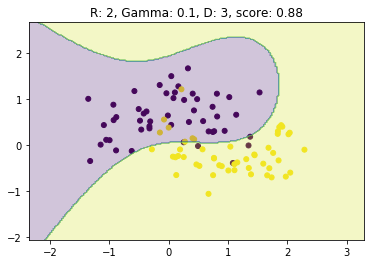

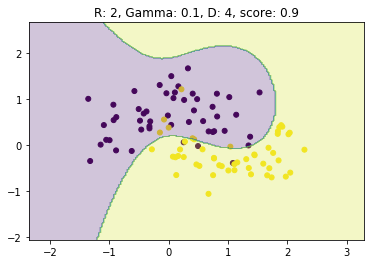

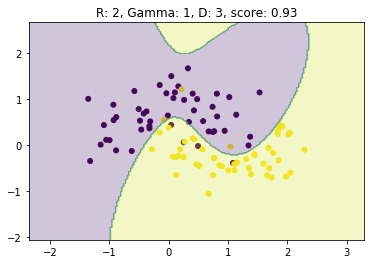

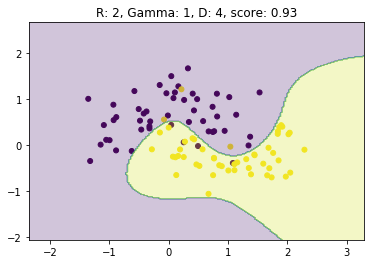

In [8]:
# Plot the prediction results in 8 subplots  
for r, g, d, clf in clf_list:
    clf.fit(X_4, y_4)
    dec = clf.predict(coords)
    dec = dec.reshape(200,200)
    plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)
    axes = plt.gca()
    axes.set_xlim([X_41_min, X_41_max])
    axes.set_ylim([X_42_min, X_42_max])
    axes.contourf(XX41, XX42, dec,alpha = .25)
    plt.title("R: {}, Gamma: {}, D: {}, score: {}".format(r, g, d, round(clf.score(X_4, y_4),2)))
    plt.show()

## The Sigmoid Kernel

Build a support vector machine using the Sigmoid kernel.

Recall that the sigmoid kernel has 2 hyperparameters:
- $\gamma$, which can be specified using keyword `gamma`
- $r$, which can be specified using keyword `coef0`


Look at 9 solutions using the following values for $\gamma$ and $r$.

- $\gamma= 0.001, 0.01$ and $0.1$
- $r = 0.01, 1$ and $10$

In [9]:
# Create a loop that builds a model for each of the 9 combinations
G = [0.001, 0.01, 0.1]
R = [0.01, 1, 10]
clf_list = []
for g in G:
    for r in R:
        clf = svm.SVC(C = c, kernel = 'sigmoid', coef0 = r, gamma = g, degree = d)
        clf_list.append([g, r, clf])

In [10]:
# Prepare your data for plotting


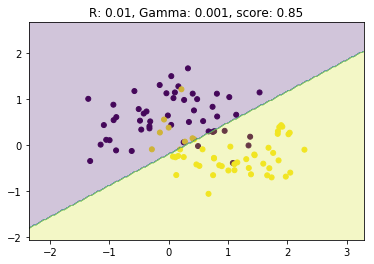

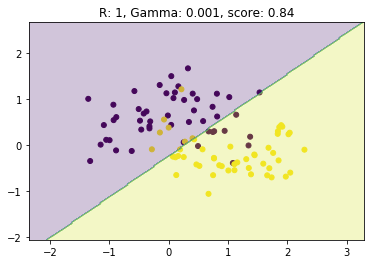

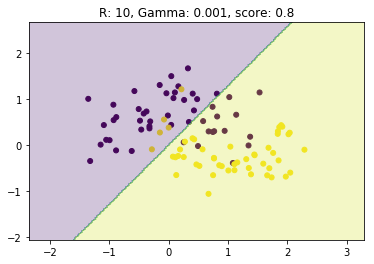

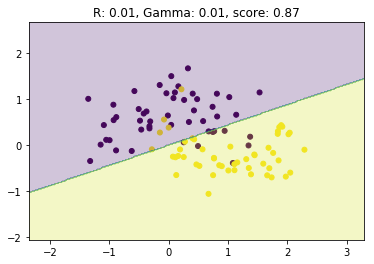

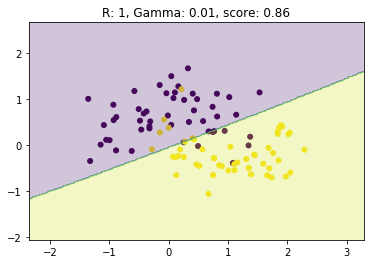

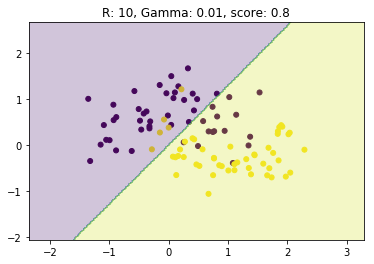

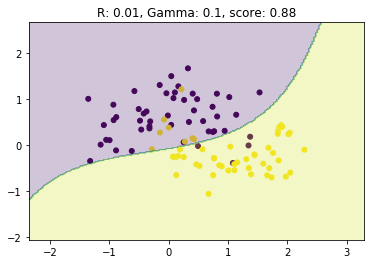

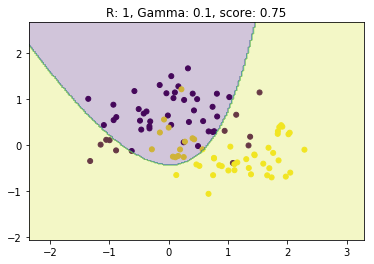

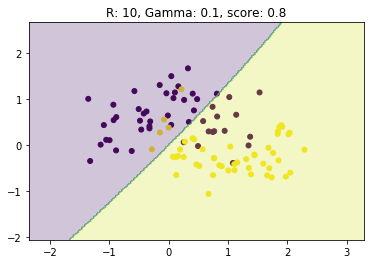

In [11]:
# Plot the prediction results in 9 subplots  
for g, r, clf in clf_list:
    clf.fit(X_4, y_4)
    dec = clf.predict(coords)
    dec = dec.reshape(200,200)
    plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)
    axes = plt.gca()
    axes.set_xlim([X_41_min, X_41_max])
    axes.set_ylim([X_42_min, X_42_max])
    axes.contourf(XX41, XX42, dec,alpha = .25)
    plt.title("R: {}, Gamma: {}, score: {}".format(r, g, round(clf.score(X_4, y_4),2)))
    plt.show()

## What is your conclusion here?

- The polynomial kernel is very sensitive to the hyperparameter settings. Especially setting a "wrong" gamma can have a dramatic effect on the model performance
- Our experiments with the Polynomial kernel were more successful

## Explore the Polynomial Kernels again, yet now performing a train-test-split

Explore the same parameters you did before when exploring Polynomial Kernels
- Do a train test split of 2/3 train vs 1/3 test. 
- Train the model on the training set, plot the result and theh accuracy score.
- Next, plot the model with the test set and the resulting accuracy score. Make some notes for yourself on training vs test performance and selecting an appropriate model based on these results.


In [12]:
# Perform a train test split, then create a loop that builds a model for each of the 8 combinations

X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size = 0.33, random_state = 10)

R = [0.1, 2]
G = [0.1, 1]
D = [3, 4]
clf_list = []
for r in R:
    for g in G:
        for d in D:
            clf = svm.SVC(C = c, kernel = 'poly', coef0 = r, gamma = g, degree = d)
            clf_list.append([r, g, d, clf])
            

In [13]:
# Prepare your data for plotting


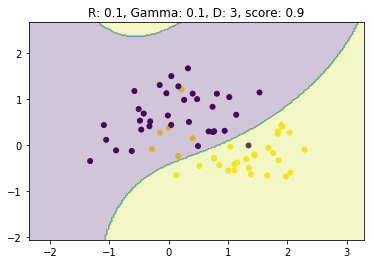

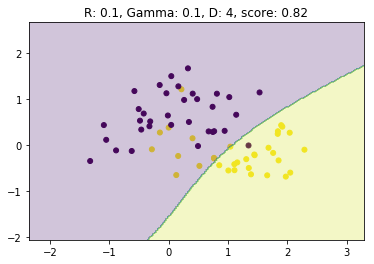

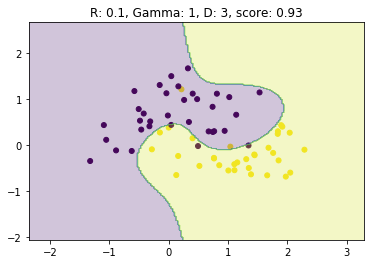

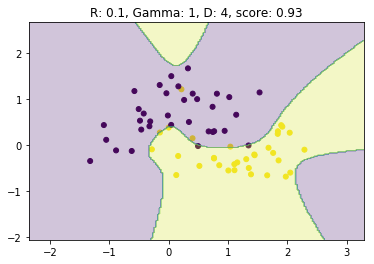

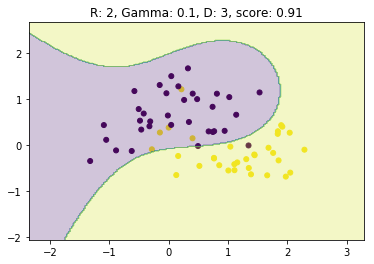

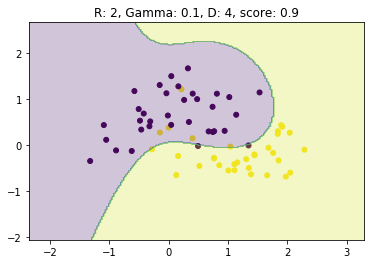

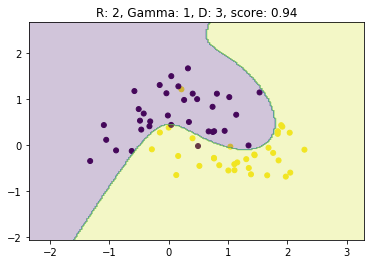

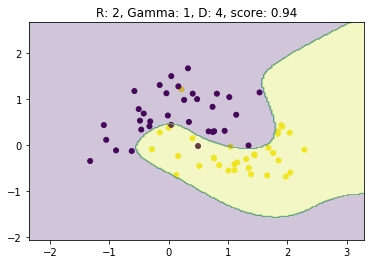

In [14]:
# Plot the prediction results in 8 subplots on the training set  
for r, g, d, clf in clf_list:
    clf.fit(X_train, y_train)
    dec = clf.predict(coords)
    dec = dec.reshape(200,200)
    plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s=25)
    axes = plt.gca()
    axes.set_xlim([X_41_min, X_41_max])
    axes.set_ylim([X_42_min, X_42_max])
    axes.contourf(XX41, XX42, dec, alpha = .25)
    plt.title("R: {}, Gamma: {}, D: {}, score: {}".format(r, g, d, round(clf.score(X_train, y_train),2)))
    plt.show()

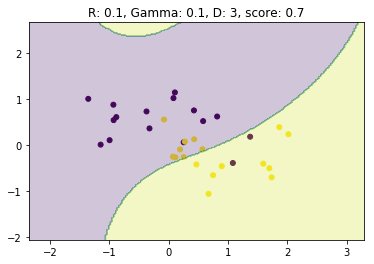

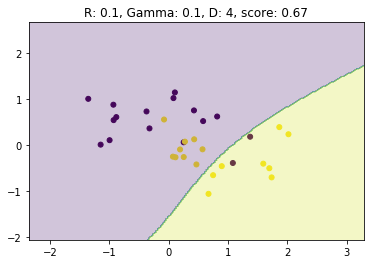

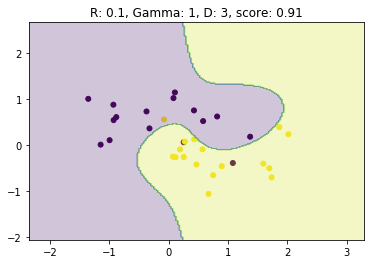

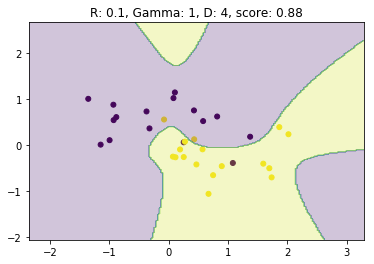

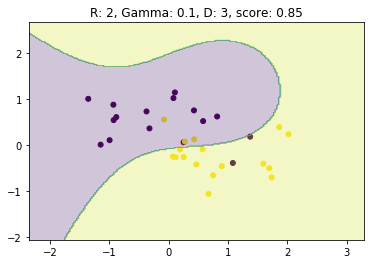

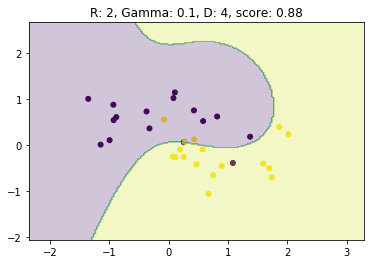

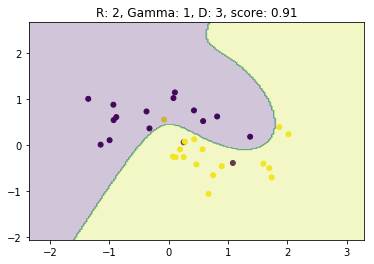

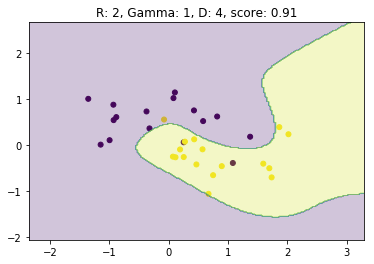

In [15]:
# Now plot the prediction results for the test set
for r, g, d, clf in clf_list:
    dec = clf.predict(coords)
    dec = dec.reshape(200,200)
    plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s=25)
    axes = plt.gca()
    axes.set_xlim([X_41_min, X_41_max])
    axes.set_ylim([X_42_min, X_42_max])
    axes.contourf(XX41, XX42, dec, alpha = .25)
    plt.title("R: {}, Gamma: {}, D: {}, score: {}".format(r, g, d, round(clf.score(X_test, y_test),2)))
    plt.show()

## A higher-dimensional, real world data set

Until now, we've only considered data sets with 2 features to make it easy to understand what's going on visually. Remember that you can use Support Vector Machines on a wide range of classification data sets, with more than 2 features. It will no longer be possible to visually represent decision boundaries (at least, if you have more than 3 feature spaces), but you'll still be able to make predictions.

Let's use the salaries dataset again (in `salaries_final.csv`). Recall that the 6 predictors are:

- `Age`: continuous.

- `Education`: Categorical. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- `Occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- `Relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- `Race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- `Sex`: Female, Male.

We've imported the data for you and have also converted the data set using `dmatrices`. Look at the final data structure! `dmatrices` is used very often for preprocessing data with continuous and categorical predictors.

In [19]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
salaries = pd.read_csv("salaries_final.csv", index_col = 0)
salaries.head()

,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


In [30]:
from patsy import dmatrices
target, data = dmatrices('C(Target) ~ Age  + C(Race)+ C(Education)+ C(Relationship)+ C(Sex)+ C(Occupation)', salaries, return_type = "dataframe")
target.head()

,C(Target)[<=50K],C(Target)[>50K]
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


Now build a simple linear SVM using this data. Note that using SVC, some slack is automatically allowed, so the data doesn't have to perfectly linearly separable.

- Create a train-test-split of 75-25
- Make sure that you set "probability = True"
- after you ran the model, make probability predictions on the test set, and calculate the classification accuracy score

In [31]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(data, target['C(Target)[>50K]'], test_size = 0.25, random_state = 10)
clf = svm.SVC(kernel = 'linear', probability = True)
clf.fit(X_train, y_train)
y_hat_test = clf.predict_proba(X_test)

In [34]:
# Your code here
from sklearn.metrics import accuracy_score
clf.score(X_test, y_test)

0.8195553371821643

In [ ]:
# Your code here

In [ ]:
# Your code here

Note that it takes quite a while to compute this. The score is slightly better than the best result obtained using decision trees, but do note that SVMs are computationally expensive. Changing kernels can even make computation times much longer.

## Summary

Great, you've got plenty of practice in on Support Vector Machines! In this lab you explored kernels and applying SVM on real-life data!